In [8]:
from matplotlib import pyplot as plt
import numpy
from sklearn import svm
from scipy import io
%matplotlib inline

# Support Vector Machines

Load in the data for the first part of the exercise, and plot it:

In [12]:
loadedData = io.loadmat("ex6/ex6data1.mat")
print loadedData.keys()
X = loadedData['X']
Y = loadedData['y']

['y', 'X', '__version__', '__header__', '__globals__']


In [57]:
# For plotting, break into positive and negative samples:

pos = numpy.array([X[i] for i in xrange(len(X)) if Y[i] == 1])
neg = numpy.array([X[i] for i in xrange(len(X)) if Y[i] == 0])


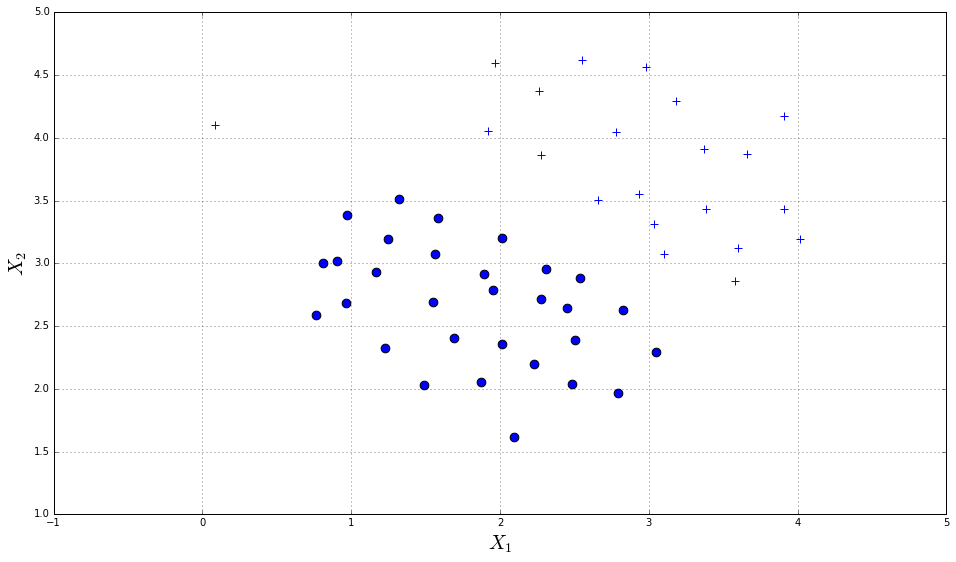

In [62]:
fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(pos[:,0], pos[:,1], marker="+", s=75)
plt.scatter(neg[:,0], neg[:,1], marker="o", s=75)

plt.xlabel(r"$X_1$", fontsize=20)
plt.ylabel(r"$X_2$", fontsize=20)
plt.grid(True)
plt.show()

Use sklearn to build an SVM:

In [63]:
svc_1 = svm.SVC(C=1, kernel='linear')

In [81]:
svc_1.fit(X,Y.flatten())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [82]:
print X[40:41]
svc_1.predict(X[0:1])

[[ 0.9735  3.3881]]


array([1], dtype=uint8)

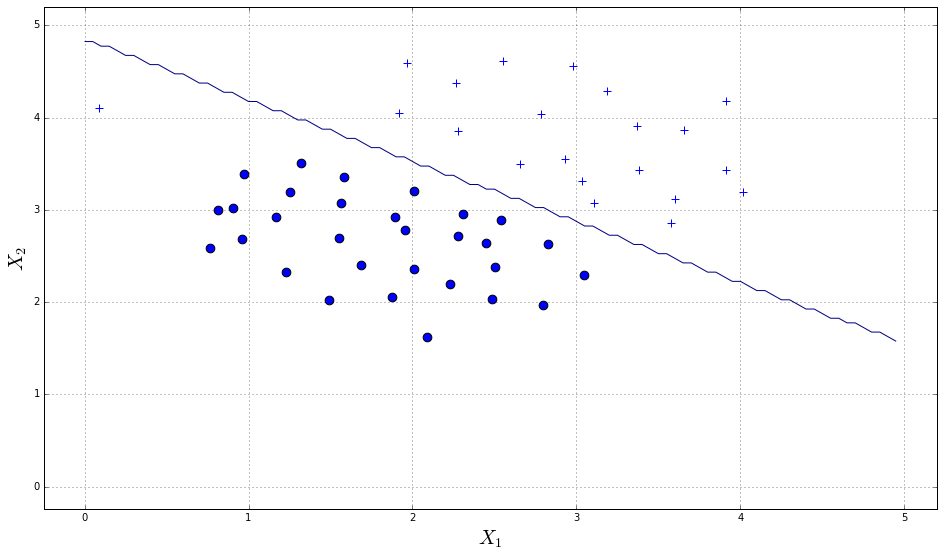

In [95]:
x_vals = numpy.arange(0, 5, 0.05)
y_vals = numpy.arange(0, 5, 0.05)

z_vals = numpy.zeros((len(x_vals), len(y_vals)))

for i in xrange(len(x_vals)):
    for j in xrange(len(y_vals)):
        z_vals[i][j] = svc_1.predict(numpy.array([[x_vals[i], y_vals[j]]]))

fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(pos[:,0], pos[:,1], marker="+", s=75)
plt.scatter(neg[:,0], neg[:,1], marker="o", s=75)

plt.contour(x_vals, y_vals, z_vals.T, [0.5])

plt.xlabel(r"$X_1$", fontsize=20)
plt.ylabel(r"$X_2$", fontsize=20)
plt.grid(True)
plt.show()

In [94]:
svc_100 = svm.SVC(C=100, kernel='linear')
svc_100.fit(X,Y.flatten())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

[[ 0.  0.  0. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  1.  1.  1.]
 ..., 
 [ 0.  0.  0. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  1.  1.  1.]]


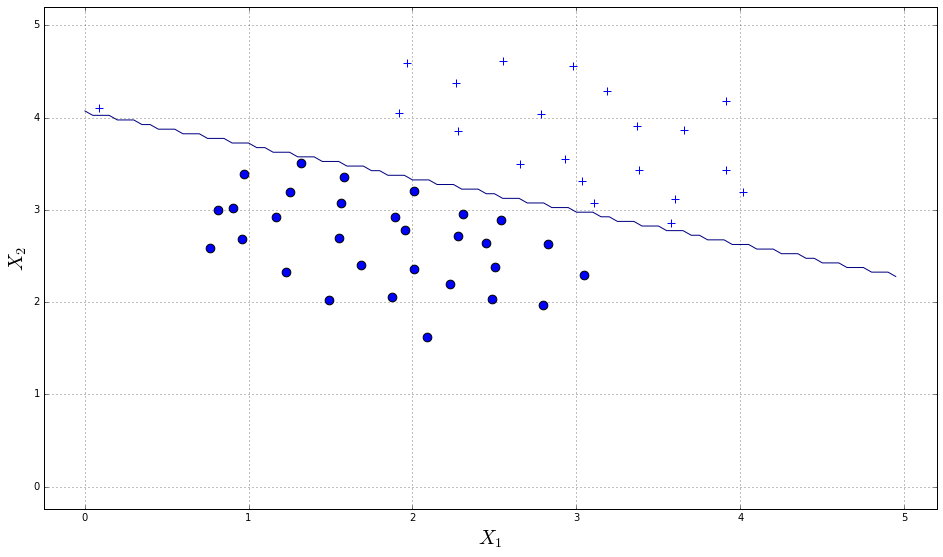

In [98]:
x_vals = numpy.arange(0, 5, 0.05)
y_vals = numpy.arange(0, 5, 0.05)

z_vals = numpy.zeros((len(x_vals), len(y_vals)))

for i in xrange(len(x_vals)):
    for j in xrange(len(y_vals)):
        z_vals[i][j] = svc_100.predict(numpy.array([[x_vals[i], y_vals[j]]]))

print z_vals
fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(pos[:,0], pos[:,1], marker="+", s=75)
plt.scatter(neg[:,0], neg[:,1], marker="o", s=75)

plt.contour(x_vals, y_vals, z_vals.T, [0.5])

# plt.legend(fontsize=20)
plt.xlabel(r"$X_1$", fontsize=20)
plt.ylabel(r"$X_2$", fontsize=20)
plt.grid(True)
plt.show()

# SVM with Gaussian Boundaries

In the homework set, they request a Gaussian kernel.  But, the sklearn package default is actually a gaussian kernel.  There isn't much to learn by implementing this, so I'll just train with the gaussian kernel.

In [103]:
loadedData = io.loadmat("ex6/ex6data2.mat")
print loadedData.keys()
X = loadedData['X']
Y = loadedData['y']

['y', 'X', '__version__', '__header__', '__globals__']


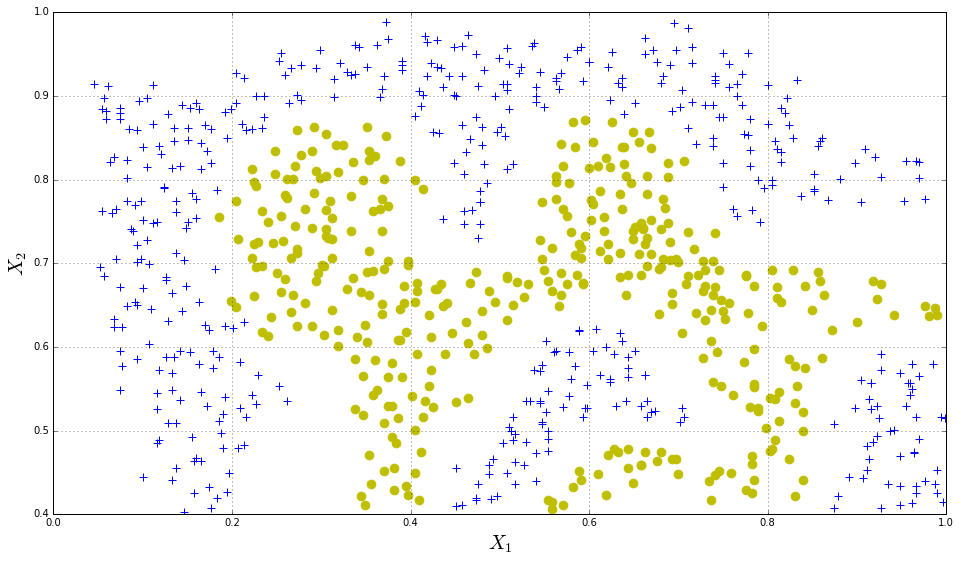

In [107]:
pos = numpy.array([X[i] for i in xrange(len(X)) if Y[i] == 1])
neg = numpy.array([X[i] for i in xrange(len(X)) if Y[i] == 0])

fig, ax = plt.subplots(figsize=(16,9))

plt.scatter(pos[:,0], pos[:,1], marker="+", s=75)
plt.scatter(neg[:,0], neg[:,1], marker="o", s=75, color="y")

plt.xlabel(r"$X_1$", fontsize=20)
plt.ylabel(r"$X_2$", fontsize=20)
plt.xlim([0,1])
plt.ylim([0.4,1])
plt.grid(True)
plt.show()

In [129]:
sigma=0.05
gamma = numpy.power(sigma, -2)
svm_gaus = svm.SVC(C=1, gamma=gamma)

In [130]:
svm_gaus.fit(X, Y.flatten())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=399.99999999999994,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Plot the decision boundary for this data set:

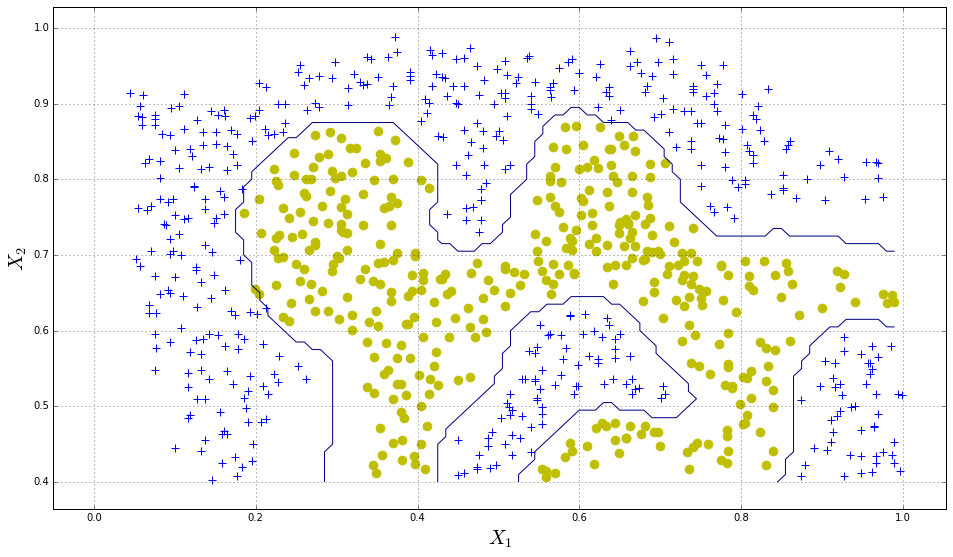

In [131]:
x_vals = numpy.arange(0, 1, 0.01)
y_vals = numpy.arange(0.4, 1, 0.01)

z_vals = numpy.zeros((len(x_vals), len(y_vals)))

for i in xrange(len(x_vals)):
    for j in xrange(len(y_vals)):
        z_vals[i][j] = svm_gaus.predict(numpy.array([[x_vals[i], y_vals[j]]]))

fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(pos[:,0], pos[:,1], marker="+", s=75)
plt.scatter(neg[:,0], neg[:,1], marker="o", s=75, color='y')

plt.contour(x_vals, y_vals, z_vals.T, [0.5])

# plt.legend(fontsize=20)
plt.xlabel(r"$X_1$", fontsize=20)
plt.ylabel(r"$X_2$", fontsize=20)
plt.grid(True)
plt.show()

# Determining the best versions of parameters

In [136]:
loadedData = io.loadmat("ex6/ex6data3.mat")
print loadedData.keys()
X = loadedData['X']
Y = loadedData['y']
X_val = loadedData["Xval"]
Y_val = loadedData["yval"]

['yval', '__header__', '__globals__', 'Xval', 'y', 'X', '__version__']


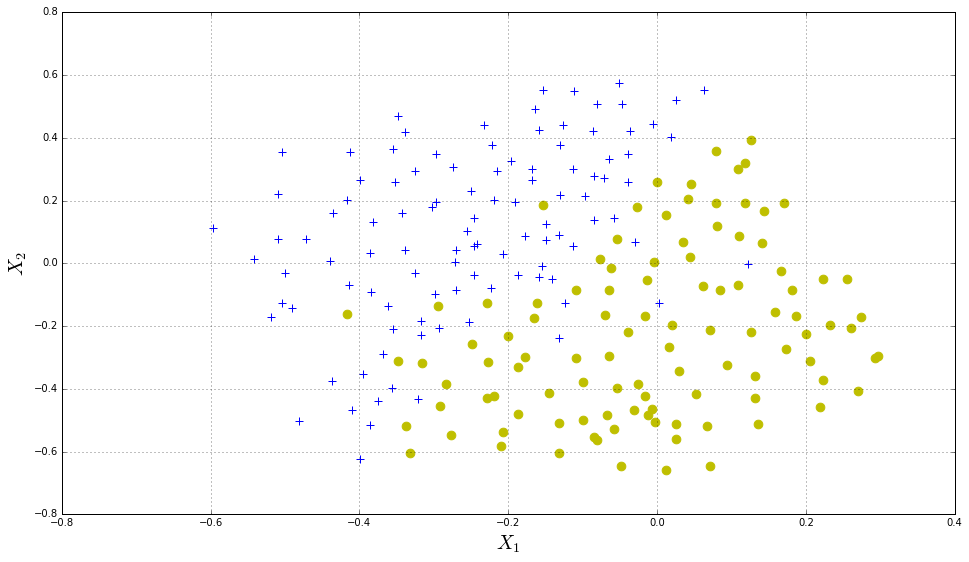

In [137]:
pos = numpy.array([X[i] for i in xrange(len(X)) if Y[i] == 1])
neg = numpy.array([X[i] for i in xrange(len(X)) if Y[i] == 0])

fig, ax = plt.subplots(figsize=(16,9))

plt.scatter(pos[:,0], pos[:,1], marker="+", s=75)
plt.scatter(neg[:,0], neg[:,1], marker="o", s=75, color="y")

plt.xlabel(r"$X_1$", fontsize=20)
plt.ylabel(r"$X_2$", fontsize=20)
# plt.xlim([0,1])
# plt.ylim([0.4,1])
plt.grid(True)
plt.show()

We have a range of parameters to try for this section, for both the C and sigma parameters:

In [158]:
C_params = [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.]
sigma_params = [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.]
svm_list = dict()
best_C = 0.01
best_sigma = 0.01
best_score = 0.0
for C, sigma in zip(C_params, sigma_params):
    if not C in svm_list.keys():
        svm_list[C] = dict()
        gamma = numpy.power(sigma, -2.)
        svm_list[C][sigma] = svm.SVC(C, gamma=gamma)
        svm_list[C][sigma].fit(X, Y.flatten())
        score = svm_list[C][sigma].score(X_val, Y_val)
        if score > best_score:
            best_C = C
            best_sigma = sigma
            best_score = score

print "Best C, sigma pair was ({}, {}) with a score of {}".format(best_C, best_sigma, best_score)

Best C, sigma pair was (0.3, 0.3) with a score of 0.95


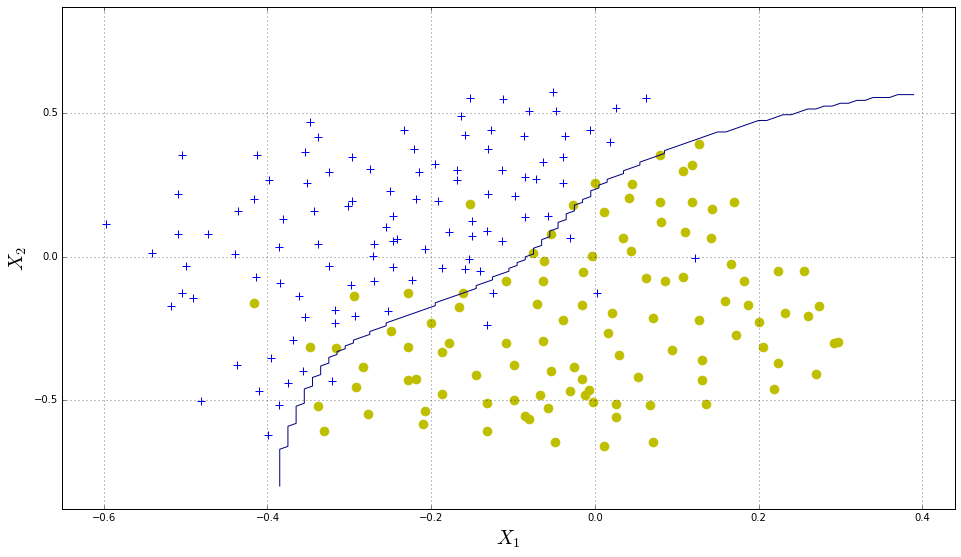

In [159]:
x_vals = numpy.arange(-0.6, 0.4, 0.01)
y_vals = numpy.arange(-0.8, 0.8, 0.01)

z_vals = numpy.zeros((len(x_vals), len(y_vals)))

for i in xrange(len(x_vals)):
    for j in xrange(len(y_vals)):
        z_vals[i][j] = svm_list[best_C][best_sigma].predict(numpy.array([[x_vals[i], y_vals[j]]]))

fig, ax = plt.subplots(figsize=(16,9))
plt.scatter(pos[:,0], pos[:,1], marker="+", s=75)
plt.scatter(neg[:,0], neg[:,1], marker="o", s=75, color='y')

plt.contour(x_vals, y_vals, z_vals.T, [0.5])

# plt.legend(fontsize=20)
plt.xlabel(r"$X_1$", fontsize=20)
plt.ylabel(r"$X_2$", fontsize=20)
plt.grid(True)
plt.show()

That looks pretty reasonable!

# Spam Classifier

For the spam classifier, we can start by reading in the data and working on the preprocessing part.

In [167]:
email_1= ""
with open('ex6/emailSample1.txt', 'r') as email1:
    for line in email1:
        print r"{}".format(line.rstrip('\n'))
        email_1 += line

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com



In [171]:
import re

We need to implement processEmail to perform all of the functions that are needed:

In [176]:
def processEmail(email):
    
    # Put everything to lower case:
    _result = email.lower()
    
    # Remove html, as suggested on stackoverflow (https://stackoverflow.com/questions/753052/strip-html-from-strings-in-python)
    _result = re.sub('<[^<]+?>', '', _result)
    
    # (The rest of this is copied from David Kaleko's solution to this, since I don't want to deal with regular expressions)
    
    #Any numbers get replaced with the string 'number'
    _result = re.sub('[0-9]+', 'number', _result)
    
    #Anything starting with http or https:// replaced with 'httpaddr'
    _result = re.sub('(http|https)://[^\s]*', 'httpaddr', _result)
    
    #Strings with "@" in the middle are considered emails --> 'emailaddr'
    _result = re.sub('[^\s]+@[^\s]+', 'emailaddr', _result);
    
    #The '$' sign gets replaced with 'dollar'
    _result = re.sub('[$]+', 'dollar', _result);
    
    return _result

In [177]:
print processEmail(email_1)


> anyone knows how much it costs to host a web portal ?
>
well, it depends on how many visitors you're expecting.
this can be anywhere from less than number bucks a month to a couple of dollarnumber. 
you should checkout httpaddr or perhaps amazon ecnumber 
if youre running something big..

to unsubscribe yourself from this mailing list, send an email to:
emailaddr


